In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import full_model as fm

In [5]:
# Create a sample graph
G = nx.erdos_renyi_graph(100, 0.03, directed=True)
#G = nx.barabasi_albert_graph(100, 3).to_directed()

In [6]:
# Initialize the InfluenceDeinfluenceModel
model = fm.InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 8
influencers = model.greedy_hill_climbing(k, steps=10)
model.set_influencers(influencers)

In [7]:
# Rank nodes using different centrality measures
k_deinfluencers = 5

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)


In [8]:
print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)

Degree Centrality Ranking: [55, 71, 57, 78, 31]
Closeness Centrality Ranking: [27, 39, 19, 84, 38]
Betweenness Centrality Ranking: [68, 57, 62, 71, 78]
Eigenvector Centrality Ranking: [27, 39, 71, 38, 78]
PageRank Centrality Ranking: [78, 27, 39, 62, 57]


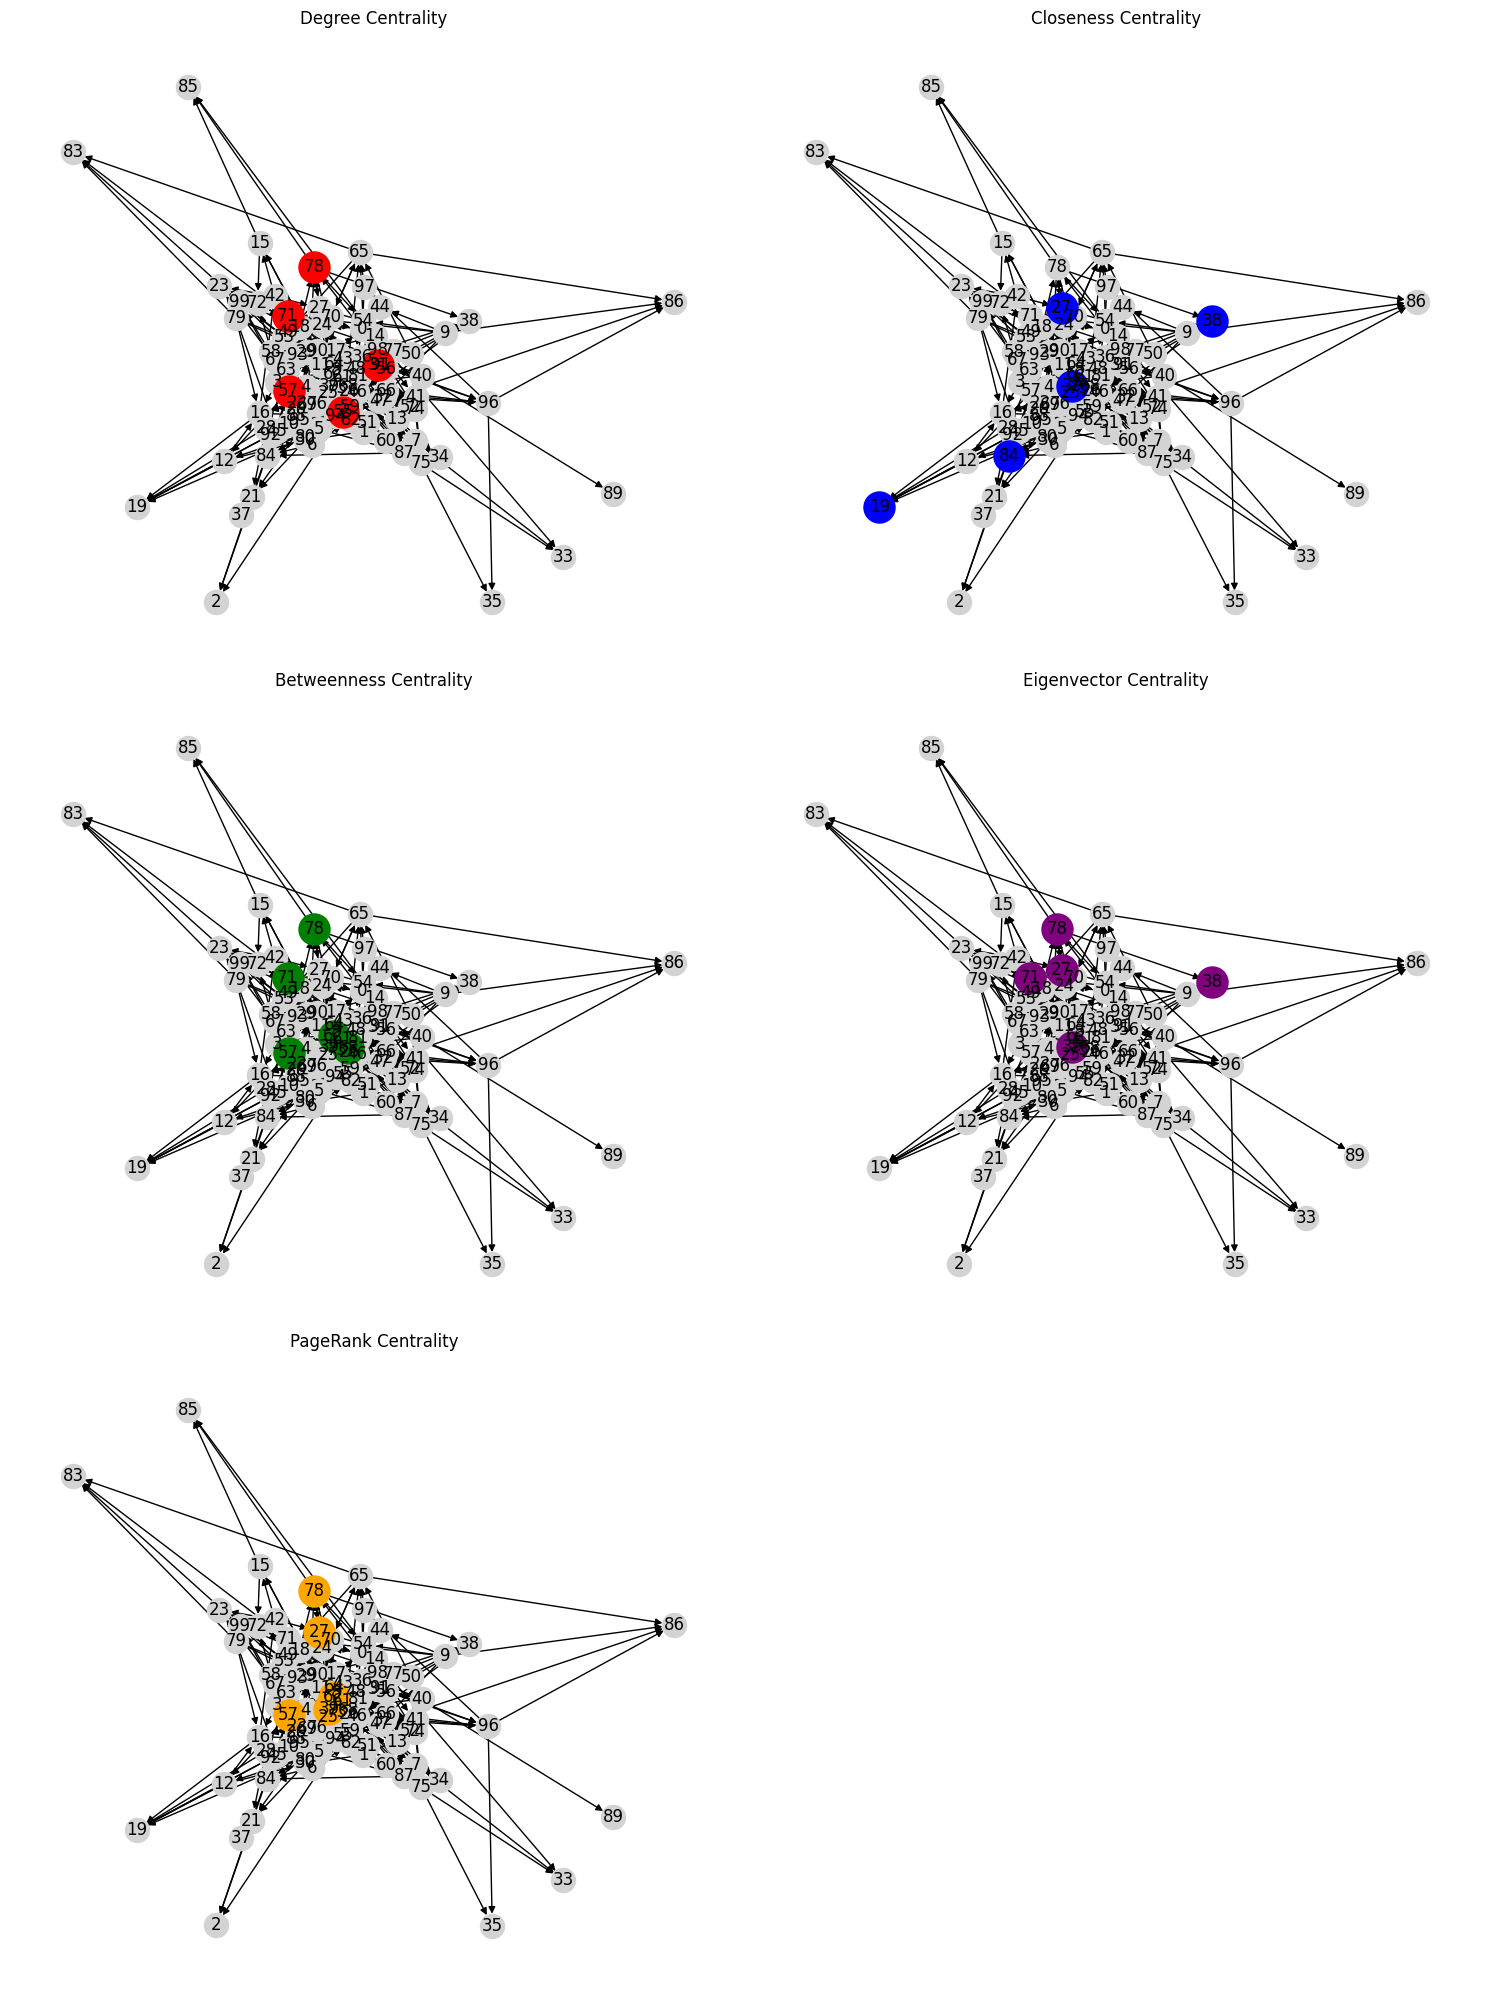

In [9]:
def plot_rankings_subplots(graph, rankings):
    pos = nx.spring_layout(graph)
    color_map = {
        'Degree Centrality': 'red',
        'Closeness Centrality': 'blue',
        'Betweenness Centrality': 'green',
        'Eigenvector Centrality': 'purple',
        'PageRank Centrality': 'orange'
    }
    
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, (centrality, nodes) in enumerate(rankings.items()):
        ax = axs[i]
        ax.set_title(centrality)
        nx.draw(graph, pos, with_labels=True, node_color='lightgrey', ax=ax)
        nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_color=color_map[centrality], ax=ax, node_size=500, label=centrality)
    
    # Remove the unused subplot
    fig.delaxes(axs[-1])
    
    plt.tight_layout()
    plt.show()

rankings = {
    'Degree Centrality': degree_centrality_ranking,
    'Closeness Centrality': closeness_centrality_ranking,
    'Betweenness Centrality': betweenness_centrality_ranking,
    'Eigenvector Centrality': eigenvector_centrality_ranking,
    'PageRank Centrality': pagerank_centrality_ranking
}

plot_rankings_subplots(G, rankings)


In [10]:
G = nx.erdos_renyi_graph(100, 0.05, directed=True)

# Initialize the InfluenceDeinfluenceModel
model = fm.InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 5
influencers = model.greedy_hill_climbing(k, steps=5)

print("Influencers:", influencers)

Influencers: {45, 46, 83, 84, 57}


In [11]:
# Function to run cascade and count deinfluenced nodes
def count_deinfluenced(model, influencers, deinfluencers, num_runs, steps=10):
    total_deinfluenced = 0
    for _ in range(num_runs):
        model.set_initial_states()
        model.set_influencers(influencers)
        model.set_deinfluencers(deinfluencers)
        model.run_cascade(steps)
        total_deinfluenced += model.count_deinfluenced()
    avg_deinfluenced = total_deinfluenced / num_runs
    return avg_deinfluenced

# Rank nodes using different centrality measures
k_deinfluencers = 5

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)

print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)

# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 1000  # Number of times to run the cascade for averaging
steps = 10
results = {
    'Degree': count_deinfluenced(model, influencers, degree_centrality_ranking, num_runs, steps=steps),
    'Closeness': count_deinfluenced(model, influencers, closeness_centrality_ranking, num_runs, steps=steps),
    'Betweenness': count_deinfluenced(model, influencers, betweenness_centrality_ranking, num_runs, steps=steps),
    'Eigenvector': count_deinfluenced(model, influencers, eigenvector_centrality_ranking, num_runs, steps=steps),
    'PageRank': count_deinfluenced(model, influencers, pagerank_centrality_ranking, num_runs, steps=steps)
}

Degree Centrality Ranking: [88, 13, 23, 72, 93]
Closeness Centrality Ranking: [55, 97, 51, 85, 2]
Betweenness Centrality Ranking: [97, 93, 23, 2, 53]
Eigenvector Centrality Ranking: [51, 2, 85, 55, 88]
PageRank Centrality Ranking: [2, 97, 39, 23, 51]


Influencers: {70, 7, 8, 16, 22}
Degree Centrality Ranking: [48, 6, 56]
Closeness Centrality Ranking: [84, 62, 68]
Betweenness Centrality Ranking: [56, 94, 70]
Eigenvector Centrality Ranking: [84, 62, 68]
PageRank Centrality Ranking: [5, 19, 3]
91
Run 1/10: 91 nodes deinfluenced
Total deinfluenced nodes: 91
9
Run 2/10: 9 nodes deinfluenced
Total deinfluenced nodes: 100
3
Run 3/10: 3 nodes deinfluenced
Total deinfluenced nodes: 103
3
Run 4/10: 3 nodes deinfluenced
Total deinfluenced nodes: 106
3
Run 5/10: 3 nodes deinfluenced
Total deinfluenced nodes: 109
3
Run 6/10: 3 nodes deinfluenced
Total deinfluenced nodes: 112
3
Run 7/10: 3 nodes deinfluenced
Total deinfluenced nodes: 115
3
Run 8/10: 3 nodes deinfluenced
Total deinfluenced nodes: 118
3
Run 9/10: 3 nodes deinfluenced
Total deinfluenced nodes: 121
3
Run 10/10: 3 nodes deinfluenced
Total deinfluenced nodes: 124
Average deinfluenced nodes: 12.4
25
Run 1/10: 25 nodes deinfluenced
Total deinfluenced nodes: 25
6
Run 2/10: 6 nodes deinflu

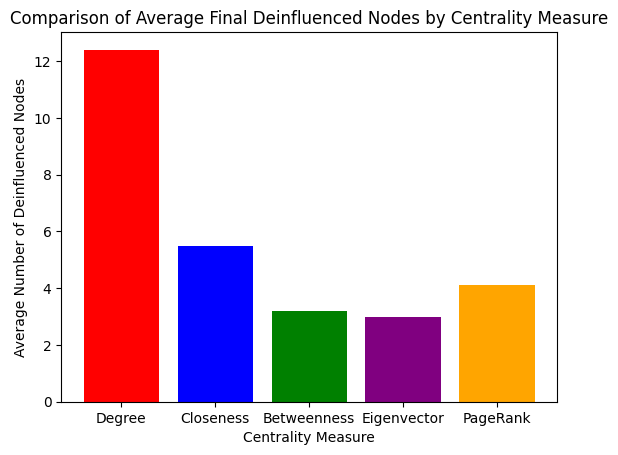

In [19]:
G = nx.erdos_renyi_graph(100, 0.05, directed=True)

# Initialize the InfluenceDeinfluenceModel
model = fm.InfluenceDeinfluenceModel(G)

# Select 5 influencers using the greedy algorithm
k = 5
influencers = model.greedy_hill_climbing(k, steps=5)

print("Influencers:", influencers)

# Function to run the cascade and count deinfluenced nodes
def count_deinfluenced(model, inf, deinf, num_runs=5):
    total_deinfluenced = 0
    for run in range(num_runs):
        model.historic_states = []
        model.set_initial_states()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps=10)
        deinfluenced_count = model.count_deinfluenced()
        print(deinfluenced_count)
        print(f"Run {run+1}/{num_runs}: {deinfluenced_count} nodes deinfluenced")
        
        total_deinfluenced += deinfluenced_count
        print(f"Total deinfluenced nodes: {total_deinfluenced}")
        
    average_deinfluenced = total_deinfluenced / num_runs
    print(f"Average deinfluenced nodes: {average_deinfluenced}")
    model.historic_states = []
    model.set_initial_states()
    return average_deinfluenced

# Initialize the model
model.set_initial_states()

# Rank nodes using different centrality measures
k_deinfluencers = 3

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)


print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)


# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 10  # Number of times to run the cascade for averaging

results = {
    'Degree': count_deinfluenced(model, influencers, degree_centrality_ranking, num_runs),
    'Closeness': count_deinfluenced(model, influencers, closeness_centrality_ranking, num_runs),
    'Betweenness': count_deinfluenced(model, influencers, betweenness_centrality_ranking, num_runs),
    'Eigenvector': count_deinfluenced(model, influencers, eigenvector_centrality_ranking, num_runs),
    'PageRank': count_deinfluenced(model, influencers, pagerank_centrality_ranking, num_runs)
}

# Print the results
for centrality, count in results.items():
    print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()

#model.display_graphs_grid()
